     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

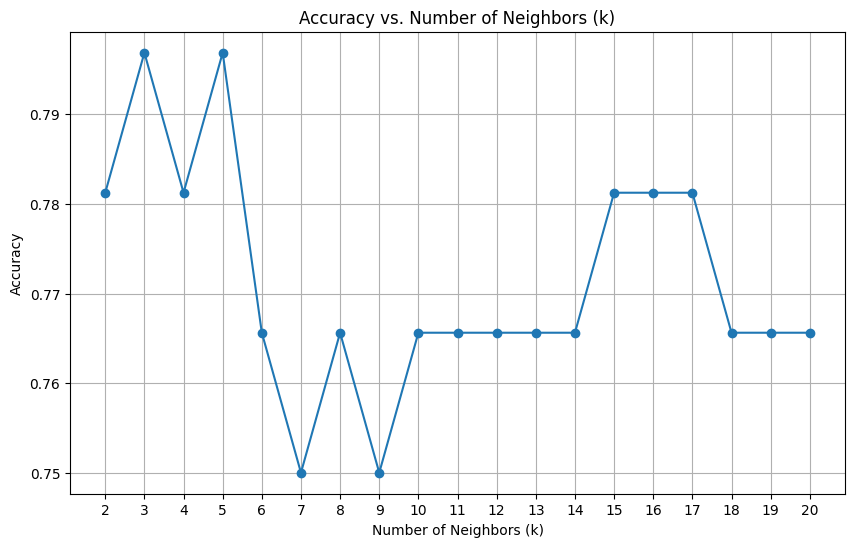

In [5]:
import pandas as pd
a=pd.read_csv("/content/breast_cancer_survival.csv")
print(a)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(a)
label_encoders = {}
for column in ['Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status','Patient_Status']:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder
print(df)
a1=a.dropna()
y=a1["Patient_Status"]
print("target variable",y)
x=a1.drop(['Surgery_type','Date_of_Surgery','Date_of_Last_Visit','Gender'],axis=1)

print(x)
print(x.shape)
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=20)
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize empty lists to store accuracy values and corresponding 'k' values
k_values = []
accuracy_values = []

# Iterate through different 'k' values from 2 to 20
for k in range(2, 21):
    # Create a k-NN classifier with the current 'k' value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn_classifier.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(x_test)

    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_values.append(accuracy)

# Plot the accuracy versus 'k'
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(2, 21, step=1))
plt.show()

   Prefecture  Life_expectancy  Physician  Junior_col  University  \
0       Aichi            84.65      224.4        13.6        23.7   
1       Akita            83.79      242.6        11.3        11.9   
2      Aomori            82.80      212.5        11.4        11.8   
3       Chiba            84.48      205.8        14.7        24.9   
4       Ehime            84.24      276.7        14.2        18.0   
5       Fukui            84.91      257.9        12.9        18.8   
6     Fukuoka            84.54      309.9        14.2        20.4   
7   Fukushima            83.71      205.7        11.6        13.1   
8        Gifu            84.71      224.5        13.4        18.5   
9       Gunma            84.16      233.8        14.7        17.5   
10  Hiroshima            85.06      267.1        16.1        23.1   
11   Hokkaido            84.00      251.3        14.1        14.4   
12      Hyogo            84.81      266.1        13.7        24.5   
13    Ibaraki            83.92    

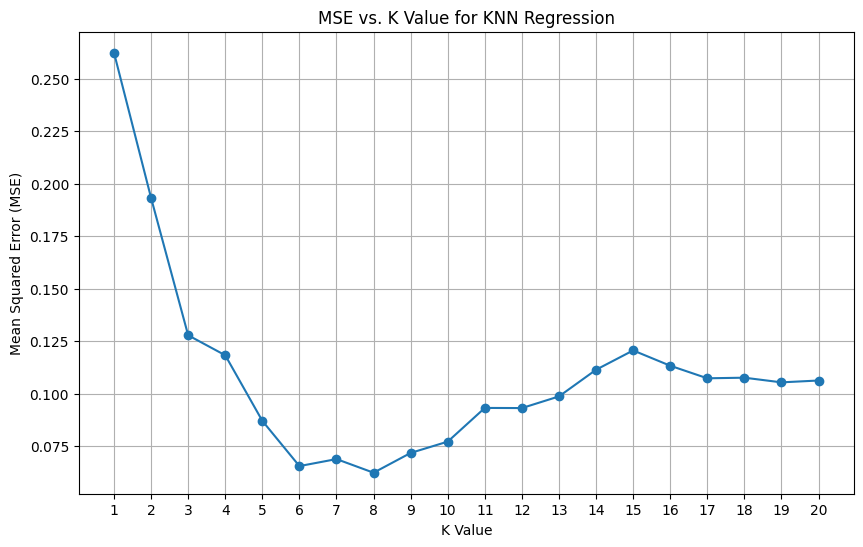

In [9]:
import pandas as pd
a=pd.read_csv("/content/Japan_life_expectancy.csv")
print(a)
a1=a.dropna()
y=a1["Life_expectancy"]
x=a1.drop(['Welfare_exp','Educ_exp','Life_expectancy','Prefecture'],axis=1)
print(x)
print(x.shape)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=20)
print(x_train)
print(y_train)
print(x_train.shape)
print(y_train.shape)
#print(x_train.isnull(),y_train.isnull())
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Create a KNN regression model with a chosen value of K
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the value of K
# Fit the model to your training data
knn_model.fit(x_train, y_train)  # X_train is your training data, y_train is the corresponding target values
# Make predictions on the testing data
y_pred = knn_model.predict(x_test)  # X_test is your testing data
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)  # y_test is the actual target values for the testing data
print("Mean Squared Error:", mse)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate some example data or use your own data
# X_train, y_train, X_test, y_test = ...

# Define a range of K values (1 to 20)
k_values = range(1, 21)

# Initialize an empty list to store MSE values for each K
mse_values = []

# Iterate over each K value and calculate MSE
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. K Value for KNN Regression')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(k_values)
plt.show()

